# **Project Name**    - Airline Classification
# **Project Type**.   - Classification
# Team Member - Shubham Kumar




##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

# ✈️ Airline Review Classification Project

## 📌 Objective

The goal of this project is to build a **binary classification model** that predicts whether a passenger would **recommend an airline** based on various features from their review. The target variable is `recommended`, which indicates whether the passenger recommended the airline (`yes` or `no`). By accurately predicting passenger satisfaction, this model can assist airlines in identifying areas of improvement and understanding customer behavior patterns.

---

## 🧾 Dataset Overview

The dataset contains over **130,000 airline reviews** submitted by passengers. However, after removing rows with missing target labels and cleaning the data, approximately **66,000 reviews** are used for modeling.

### Key Features:

- **Categorical Variables**:  
  - `airline`: Name of the airline (81+ unique values)  
  - `cabin`: Class of travel (Economy, Business, etc.)  
  - `traveller_type`: Purpose of travel (Business, Leisure, etc.)

- **Numerical Ratings**:  
  - `overall`: Overall rating (1–10)  
  - `seat_comfort`, `cabin_service`, `food_bev`, `entertainment`, `ground_service`, `value_for_money`: Sub-ratings for flight experience

- **Text Field**:  
  - `customer_review` (Dropped in this project for simplicity)

- **Dropped Columns**:  
  Features such as `aircraft`, `route`, `author`, `date_flown`, and `review_date` were removed due to high missing values or limited predictive value.

---

## 🧼 Data Cleaning and Imputation

Several steps were taken to prepare the data for classification:

1. **Removed rows** with missing target values in `recommended`.
2. **Mapped target** from `'yes'/'no'` to binary `1/0`.
3. **Imputed missing numerical ratings** using column-wise mean.
4. **Categorical columns** with missing data were imputed using mode or random imputation for diversity.
5. **Dropped high-cardinality or sparse columns** like `aircraft` and `customer_review` to avoid model noise and memory inefficiency.

---

## 🔢 Encoding Strategy

- **Airline Encoding**: Given the high cardinality of the `airline` column, simple **Label Encoding** was used. This is suitable for **tree-based models** such as Random Forest or XGBoost, which do not assume ordinal relationships between encoded values.
- **Other Categorical Variables**: Categorical columns like `cabin` and `traveller_type` were also label-encoded for compatibility with modeling pipelines.

---

## 🧠 Modeling Approach

The primary goal is to classify whether a passenger **recommends an airline** or not. The dataset exhibits some class imbalance, but it's manageable using stratified train/test splits or class weights in modeling.

Planned models for experimentation include:

- **Random Forest Classifier**
- **XGBoost Classifier**
- **Logistic Regression** (if categorical encoding is adjusted)

These models will be evaluated using metrics such as **accuracy, precision, recall, F1-score, and ROC-AUC**.

---

## 📈 Impact and Use Cases

This classification system can provide actionable insights for airline companies, such as:

- Identifying **critical service factors** that influence customer satisfaction
- Segmenting customer behavior based on cabin class or travel purpose
- Reducing negative experiences by predicting and addressing dissatisfaction early

---


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**This project aims to develop a predictive model that classifies whether a passenger is likely to recommend an airline based on their travel experience ratings and review metadata. By analyzing these structured review features, the model seeks to provide actionable insights into factors driving positive customer recommendations.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('airlinedata.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(70711)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
airline,65948
overall,67878
author,65948
review_date,65948
customer_review,65948
aircraft,112177
traveller_type,92140
cabin,68592
route,92169
date_flown,92262


<Axes: >

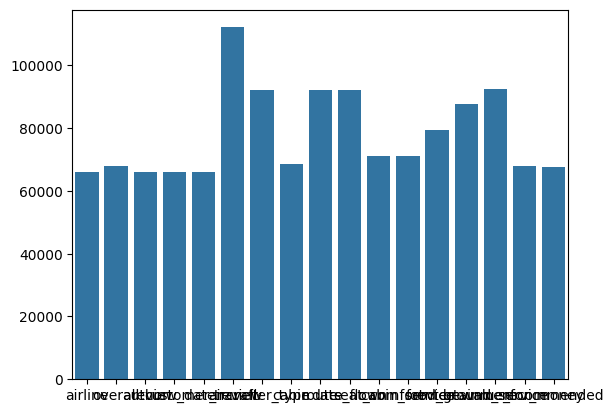

In [ ]:
# Visualizing the missing values
sns.barplot(df.isnull().sum())

### What did you know about your dataset?

The dataset has a lot of null values , also there are a lot of duplicates which is mostly the issue with data file as after every record there is a blank space so i will be removing that. The data seems very straight forward however i think customer_reviews columns will not be helpful much in derivation of the target variable which is recommendation . A little bit of mapping is needed and some imputation will clean the data .

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Variables Description

### 📊 Variable Description

| Variable          | Type         | Description                                                                 |
|-------------------|--------------|-----------------------------------------------------------------------------|
| `recommended`     | Target (binary) | Whether the passenger recommends the airline (1 = Yes, 0 = No)            |
| `airline`         | Categorical  | Name of the airline reviewed                                               |
| `traveller_type`  | Categorical  | Purpose/type of travel (e.g., Business, Leisure)                           |
| `cabin`           | Categorical  | Travel class (e.g., Economy, Business, Premium Economy)                    |
| `overall`         | Numerical    | Overall rating of the airline experience (1–10 scale)                      |
| `seat_comfort`    | Numerical    | Rating for seat comfort                                                    |
| `cabin_service`   | Numerical    | Rating for in-cabin service                                                |
| `food_bev`        | Numerical    | Rating for food and beverage                                               |
| `entertainment`   | Numerical    | Rating for in-flight entertainment                                         |
| `ground_service`  | Numerical    | Rating for airport/ground support service                                  |
| `value_for_money` | Numerical    | Rating for value relative to ticket price                                  |


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for x in df.columns:
  print(f"No of unique values of {x} is {df[x].nunique()}")

No of unique values of airline is 81
No of unique values of overall is 10
No of unique values of author is 44069
No of unique values of review_date is 3015
No of unique values of customer_review is 61172
No of unique values of aircraft is 2088
No of unique values of traveller_type is 4
No of unique values of cabin is 4
No of unique values of route is 24549
No of unique values of date_flown is 63
No of unique values of seat_comfort is 5
No of unique values of cabin_service is 5
No of unique values of food_bev is 5
No of unique values of entertainment is 5
No of unique values of ground_service is 5
No of unique values of value_for_money is 5
No of unique values of recommended is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# drop the extra rows
df.dropna(how='all',inplace=True)
# Mapping the target variable
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})
# Removing rows with missing value for target variable
df = df.dropna(subset=['recommended'])


In [ ]:
# mean imputation
num_cols = ['overall', 'seat_comfort', 'cabin_service', 'food_bev',
            'entertainment', 'ground_service', 'value_for_money']
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,1.0
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,0.0
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.0,4.0,1.0,3.0,1.0,2.0,0.0
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,1.0
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
# Dropping unnecessary columns
columns_to_drop = ['aircraft', 'date_flown', 'review_date', 'author', 'route','customer_review']
df = df.drop(columns=columns_to_drop)


In [ ]:
df['cabin'].fillna(df['cabin'].mode()[0],inplace=True)

<ipython-input-37-069dd38c3774>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cabin'].fillna(df['cabin'].mode()[0],inplace=True)


In [ ]:
df['traveller_type'].value_counts()

,count
traveller_type,
Solo Leisure,23996
Couple Leisure,16742
Family Leisure,12307
Business,11395


In [ ]:
def random_impute(series):
    missing = series.isnull()
    n_missing = missing.sum()
    if n_missing == 0:
        return series
    imputed_values = series.dropna().sample(n_missing, replace=True, random_state=42)
    series[missing] = imputed_values.values
    return series


df['traveller_type'] = random_impute(df['traveller_type'])

<ipython-input-40-32d38065014d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[missing] = imputed_values.values


In [ ]:
df.isnull().sum()

,0
airline,0
overall,0
traveller_type,0
cabin,0
seat_comfort,0
cabin_service,0
food_bev,0
entertainment,0
ground_service,0
value_for_money,0


### What all manipulations have you done and insights you found?

1.) Mean imputation for numerical columns as there is not much outliers present it is just rating from 1 to 5 and 1 to 10 .
2.) Random imputation is done for the traveller type as if i were to do mode imputation it would skew the data so that feature would've been useless .
3.) Mode imputation is done for cabin as there were very few missing data and it would not cause skewness .
4.) Some of the irrelevant columns were dropped.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

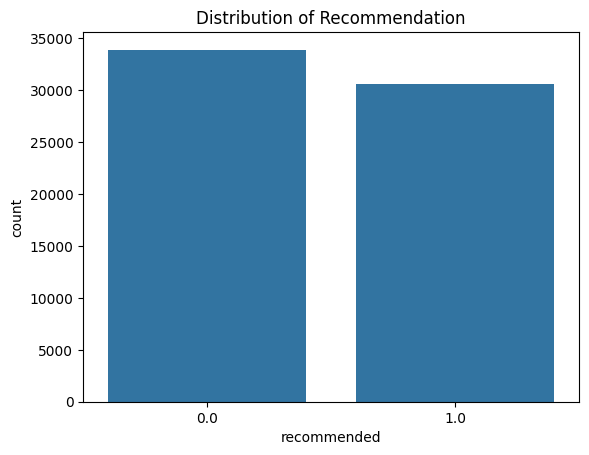

In [ ]:
# Chart - 1 visualization code
sns.countplot(data=df, x='recommended')
plt.title("Distribution of Recommendation")
plt.show()

##### 1. Why did you pick the specific chart?

It shows the class balance .

##### 2. What is/are the insight(s) found from the chart?

The dataset looks to be slightly  imbalanced  but we would consider this as a balanced dataset only .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

NO negative growth .

#### Chart - 2

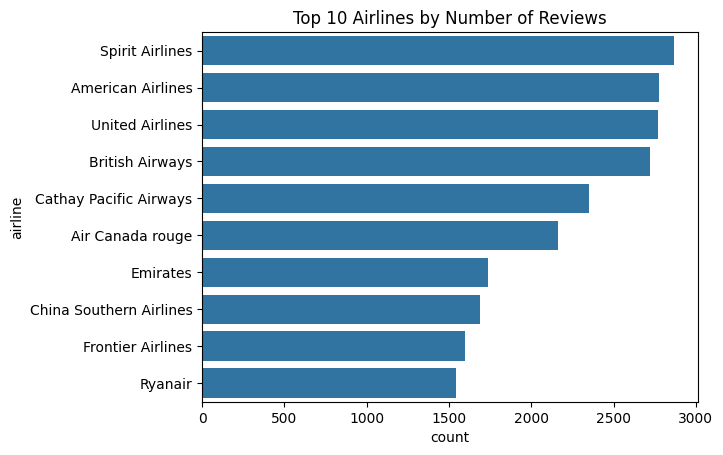

In [ ]:
# Chart - 2 visualization code
top_airlines = df['airline'].value_counts().nlargest(10).index
sns.countplot(data=df[df['airline'].isin(top_airlines)], y='airline', order=top_airlines)
plt.title("Top 10 Airlines by Number of Reviews")
plt.show()

##### 1. Why did you pick the specific chart?

Identifies the popular airlines .

##### 2. What is/are the insight(s) found from the chart?

A few airlines dominate the reviews but it looks balanced to me .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No negative growth .

#### Chart - 3

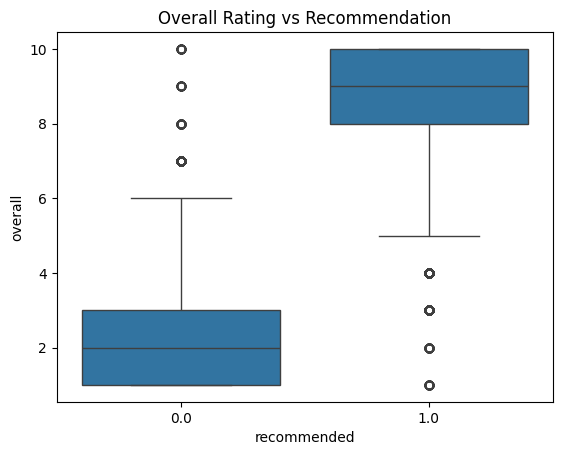

In [ ]:
# Chart - 3 visualization code
sns.boxplot(data=df, x='recommended', y='overall')
plt.title("Overall Rating vs Recommendation")
plt.show()

##### 1. Why did you pick the specific chart?

Compares the spread of overall ratings .

##### 2. What is/are the insight(s) found from the chart?

It clearly shows that most of the times if overall rating is lower then the fligthts are not recommended and if the overall ratings are higher then it is recommended . There are few outliers present for both categories of data .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

NO negative growth.

#### Chart - 4

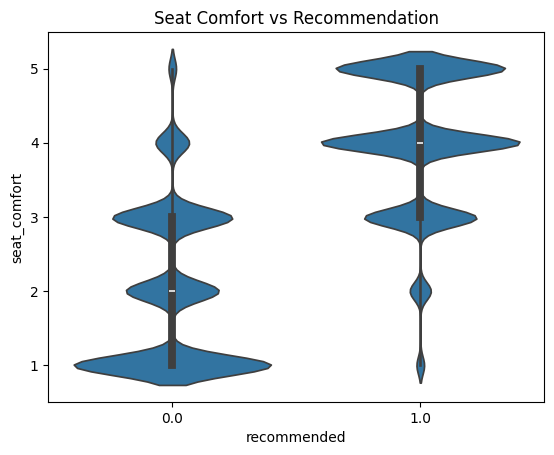

In [ ]:
# Chart - 4 visualization code
sns.violinplot(data=df, x='recommended', y='seat_comfort')
plt.title("Seat Comfort vs Recommendation")
plt.show()

##### 1. Why did you pick the specific chart?

Shows distribution shape

##### 2. What is/are the insight(s) found from the chart?

MOre comfort aligns with recommendation

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No .

#### Chart - 5

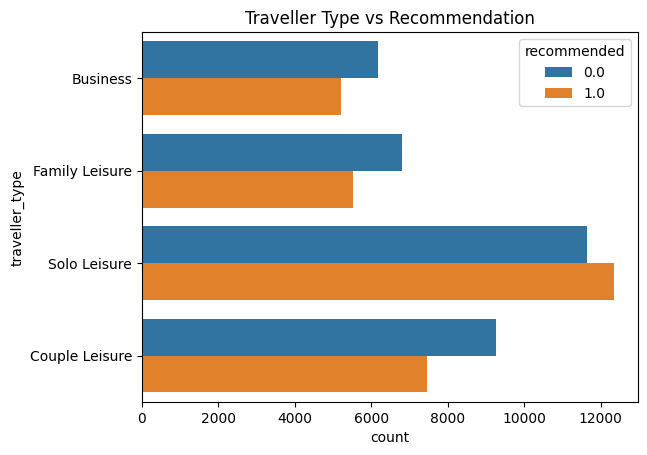

In [ ]:
# Chart - 5 visualization code
sns.countplot(data=df, y='traveller_type', hue='recommended')
plt.title("Traveller Type vs Recommendation")
plt.show()

##### 1. Why did you pick the specific chart?

It highlights the class influence on a particular variable .

##### 2. What is/are the insight(s) found from the chart?

The dataset is properly balanced for this feature .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

NO

#### Chart - 6

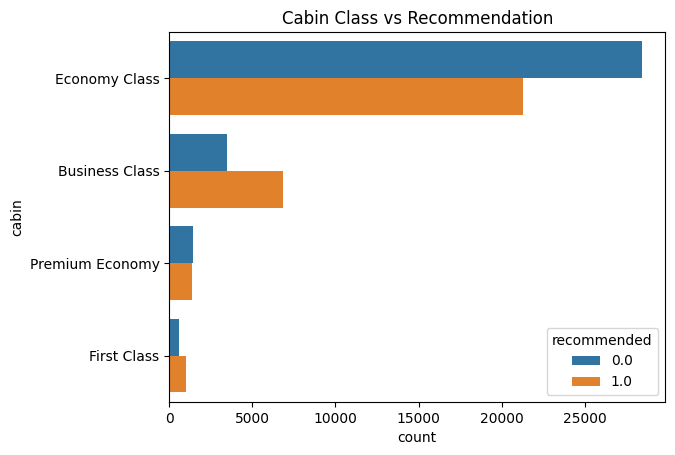

In [ ]:
# Chart - 6 visualization code
sns.countplot(data=df, y='cabin', hue='recommended')
plt.title("Cabin Class vs Recommendation")
plt.show()

##### 1. Why did you pick the specific chart?

Highlights class influence on cabin type

##### 2. What is/are the insight(s) found from the chart?

Most of the reviews are of economy type passengers but if we look about the individual class influence both have balanced data .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

no.

#### Chart - 14 - Correlation Heatmap

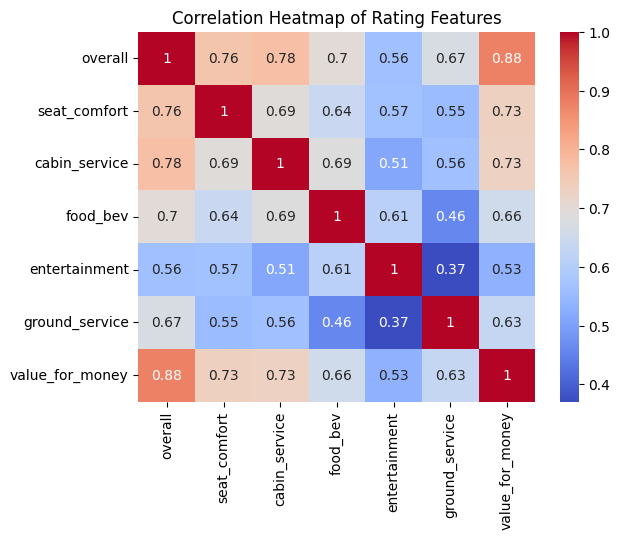

In [ ]:
# Correlation Heatmap visualization code
num_cols = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Rating Features")
plt.show()

##### 1. Why did you pick the specific chart?

Understands the feature's relationship with each other .

##### 2. What is/are the insight(s) found from the chart?

Overall ratings shows positive correlation with the sub ratings stating proper dataset.

#### Chart - 15 - Pair Plot

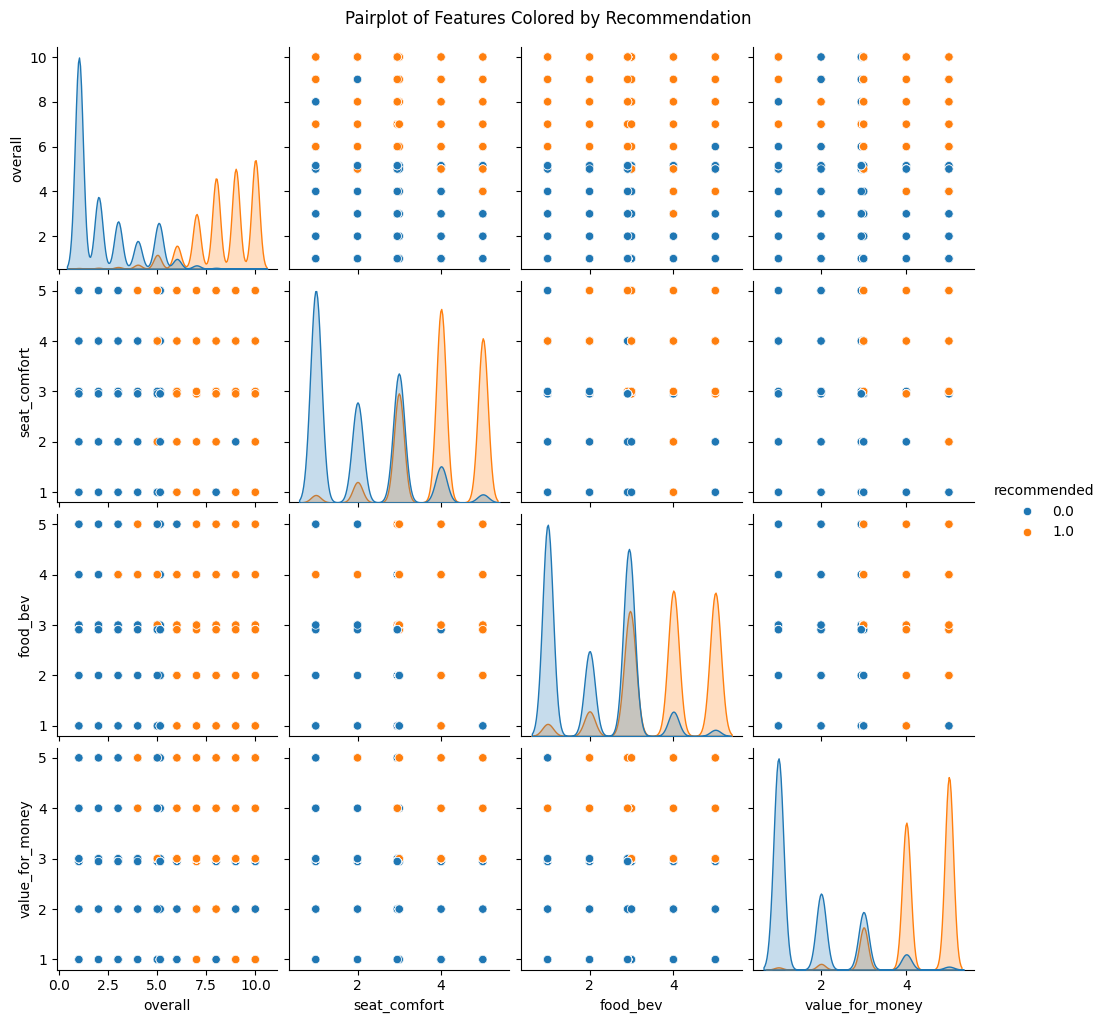

In [ ]:
# Pair Plot visualization code
sns.pairplot(df[['overall', 'seat_comfort', 'food_bev', 'value_for_money', 'recommended']], hue='recommended')
plt.suptitle("Pairplot of Features Colored by Recommendation", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

It shows the Multivaraiate patterns .

##### 2. What is/are the insight(s) found from the chart?

REcommended group clusters around high num feature values .

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Passengers who rate 'value_for_money' higher are more likely to recommend the airline.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

df_vfm = df[['value_for_money', 'recommended']]

recommended = df_vfm[df_vfm['recommended'] == 1]['value_for_money']
not_recommended = df_vfm[df_vfm['recommended'] == 0]['value_for_money']

# Perform t-test
t_stat, p_val = stats.ttest_ind(recommended, not_recommended)

print("T-statistic:", t_stat)
print("P-value:", p_val)
# Interpretation
if p_val < 0.05:
    print("Reject null hypothesis: Value for money significantly affects recommendations.")
else:
    print("Fail to reject null: No significant effect.")


T-statistic: 388.4727303638562
P-value: 0.0
Reject null hypothesis: Value for money significantly affects recommendations.


##### Which statistical test have you done to obtain P-Value?

Student t test

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis :- Business class passengers are more likely to recommend the airline than economy class passengers.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Filter only Business and Economy
df_cabin = df[df['cabin'].isin(['Business Class', 'Economy Class'])]

# Create a crosstab
cabin_ct = pd.crosstab(df_cabin['cabin'], df_cabin['recommended'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(cabin_ct)

print("Chi-square:", chi2)
print("P-value:", p)
# Interpretation
if p < 0.05:
    print("Reject null hypothesis: Cabin class is related to recommendation.")
else:
    print("Fail to reject null: No association between cabin class and recommendation.")


Chi-square: 1922.9990125669701
P-value: 0.0
Reject null hypothesis: Cabin class is related to recommendation.


##### Which statistical test have you done to obtain P-Value?

chi square test

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Traveller type influences the likelihood of recommending an airline.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Create crosstab
traveller_ct = pd.crosstab(df['traveller_type'], df['recommended'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(traveller_ct)

print("Chi-square:", chi2)
print("P-value:", p)
# Interpretation
if p < 0.05:
    print("Reject null hypothesis: Traveller type influences recommendation.")
else:
    print("Fail to reject null: Traveller type doesn't influence recommendation.")


Chi-square: 259.7793278822288
P-value: 5.018111243791197e-56
Reject null hypothesis: Traveller type influences recommendation.


##### Which statistical test have you done to obtain P-Value?

chi square .

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Already handled as part of data wrangling
df.isnull().sum()

,0
airline,0
overall,0
traveller_type,0
cabin,0
seat_comfort,0
cabin_service,0
food_bev,0
entertainment,0
ground_service,0
value_for_money,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Mean imputation for numerical columns , Mode imputation and Stochastic Random imputation for Categorical columns .

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# No such outliers present in the data as most of the data consists of ratings data which ranges in a very small value so the spread is small .

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#Split data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

le = LabelEncoder()
all_airlines = pd.concat([train_df['airline'], test_df['airline']]).unique()
all_cabins = pd.concat([train_df['cabin'], test_df['cabin']]).unique()
all_traveller_types = pd.concat([train_df['traveller_type'], test_df['traveller_type']]).unique()

le_airline = LabelEncoder().fit(all_airlines)
le_cabin = LabelEncoder().fit(all_cabins)
le_traveller_type = LabelEncoder().fit(all_traveller_types)

train_df['airline_encoded'] = le_airline.fit_transform(train_df['airline'])
train_df['cabin_encoded'] = le_cabin.fit_transform(train_df['cabin'])
train_df['traveller_type_encoded'] = le_traveller_type.fit_transform(train_df['traveller_type'])

test_df['airline_encoded'] = le_airline.transform(test_df['airline'])
test_df['cabin_encoded'] = le_cabin.transform(test_df['cabin'])
test_df['traveller_type_encoded'] = le_traveller_type.transform(test_df['traveller_type'])


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used label encoding for all of the columns as one airline had 81 unique values and if i use one hot encoding this will create a lot of features .

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
train_df = train_df.drop(columns=['airline', 'cabin', 'traveller_type'])
test_df = test_df.drop(columns=['airline', 'cabin', 'traveller_type'])

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# already done as part of data wrangling .

##### What all feature selection methods have you used  and why?

The data was pretty straight forward manual selection was done the data was completely visualisable so no need for pca.

##### Which all features you found important and why?

the overall rating and all the sub ratings along with the cabin type , traveller type and airline these features i found were important.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your


### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df)
test_df_scaled = scaler.transform(test_df)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train = train_df.drop(columns=['recommended'])
y_train = train_df['recommended']
X_test = test_df.drop(columns=['recommended'])
y_test = test_df['recommended']

##### What data splitting ratio have you used and why?

80 20 as it was a pretty small dataset .

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
y_train.value_counts()

,count
recommended,
0.0,27008
1.0,24544


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

NO balancing needed .

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((51552, 10), (12888, 10), (51552,), (12888,))

In [ ]:
# ML Model - 1 Implementation
model = LogisticRegression()
# Fit the Algorithm
model.fit(X_train,y_train)
# Predict on the model
y_pred = model.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9575574177529484
[[6628  289]
 [ 258 5713]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

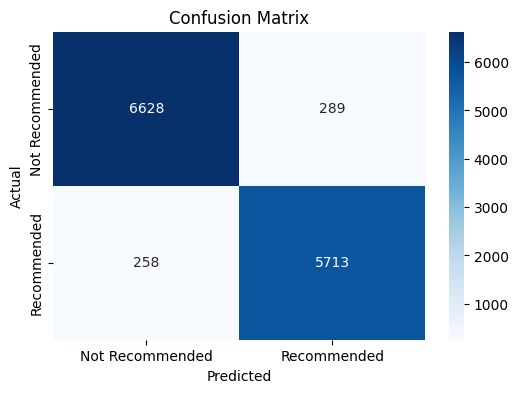

In [ ]:
# Visualizing evaluation Metric Score chart
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0, 0.5, 1]
}
lr = LogisticRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid,
                           cv=5,
                           n_jobs=1,
                           verbose=2,
                           scoring='accuracy')

# Fit the Algorithm
grid_search.fit(X_train,y_train)
# Predict on the model
best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

y_pred = best_lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test Set Accuracy: {accuracy:.4f}")

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l1, solver=saga; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l1, solver=saga; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l1, solver=saga; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l1, solver=saga; total time=   2.7s
[CV] END ...C=0.01, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=0.01, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=0.01, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=0.01, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l2, solver=saga; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l2, solver=saga; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=0, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=0.01, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.9s
[CV] END .C=0.01, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.01, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.01, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.01, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.01, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=0.01, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=0.01, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=0.01, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=0.01, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l1, solver=saga; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l1, solver=saga; total time=   2.5s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=0.01, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=0.01, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.9s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=0.01, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   3.5s
[CV] END C=0.01, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.01, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=0.01, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l1, solver=saga; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l1, solver=saga; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l1, solver=saga; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l1, solver=saga; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l1, solver=saga; total time=   2.4s
[CV] END ...C=0.01, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=0.01, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=0.01, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=0.01, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=0.01, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l2, solver=saga; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l2, solver=saga; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l2, solver=saga; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=0.01, l1_ratio=1, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=0.01, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   3.9s
[CV] END .C=0.01, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.01, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.01, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.01, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.01, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l1, solver=saga; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l1, solver=saga; total time=   2.3s
[CV] END ....C=0.1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=0.1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=0.1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=0.1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=0, penalty=l2, solver=saga; total time=   1.9s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=0.1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=0.1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=0.1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=0.1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=0.1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.7s
[CV] END ..C=0.1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=0.1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=0.1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=0.1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=0.1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=0.1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=0.1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=0.1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=0.1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=0.1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.9s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=0.1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=0.1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=0.1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   4.9s
[CV] END C=0.1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   1.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l1, solver=saga; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l1, solver=saga; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l1, solver=saga; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l1, solver=saga; total time=   5.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l1, solver=saga; total time=   3.5s
[CV] END ....C=0.1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=0.1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l2, solver=saga; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l2, solver=saga; total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l2, solver=saga; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l2, solver=saga; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=0.1, l1_ratio=1, penalty=l2, solver=saga; total time=   4.8s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=0.1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=0.1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=0.1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=0.1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=0.1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   3.2s
[CV] END ..C=0.1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=0.1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=0.1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=0.1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=0.1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=0.1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   1.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=   3.7s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.7s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   2.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   2.9s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=   2.4s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   1.8s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   2.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=   1.9s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=   2.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   1.6s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.9s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.7s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   2.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   1.9s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=   1.9s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=   2.9s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   3.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=100, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=100, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=100, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=100, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=100, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l1, solver=saga; total time=   2.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l1, solver=saga; total time=   2.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l1, solver=saga; total time=   1.9s
[CV] END ....C=100, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=100, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=100, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=100, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=100, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l2, solver=saga; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l2, solver=saga; total time=   3.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=100, l1_ratio=0, penalty=l2, solver=saga; total time=   3.6s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=100, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   6.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=100, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=100, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=100, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=100, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   2.3s
[CV] END ..C=100, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=100, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=100, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=100, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=100, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=100, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=100, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=100, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l1, solver=saga; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l1, solver=saga; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l1, solver=saga; total time=   2.6s
[CV] END ..C=100, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=100, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l2, solver=saga; total time=   2.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l2, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, l1_ratio=0.5, penalty=l2, solver=saga; total time=   2.6s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   1.9s
[CV] END C=100, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .....C=100, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=100, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=100, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=100, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=100, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=100, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=100, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=100, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=100, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=100, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.7s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l1, solver=saga; total time=   3.4s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l1, solver=saga; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l1, solver=saga; total time=   3.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l1, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l1, solver=saga; total time=   1.9s
[CV] END ....C=100, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=100, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=100, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=100, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=100, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l2, solver=saga; total time=   2.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l2, solver=saga; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=100, l1_ratio=1, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=100, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=100, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=100, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=100, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
225 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
 

[CV] END .C=100, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   1.9s
[CV] END ..C=100, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=100, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=100, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=100, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=100, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=100, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=100, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
Best Hyperparameters: {'C': 0.01, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}
Test Set Accuracy: 0.9576

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


##### Which hyperparameter optimization technique have you used and why?

IT is a samll dataset so i went with grid search cv as it is works with complete data and making it more robust .

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Best Hyperparameters: {'C': 0.01, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}
Test Set Accuracy: 0.9576

A little better i would say but since it's a very simple model and already the model was performing really good so no need for anything extra .

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Fit the Algorithm
rf.fit(X_train,y_train)
# Predict on the model
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9605834885164494
[[6675  297]
 [ 211 5705]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

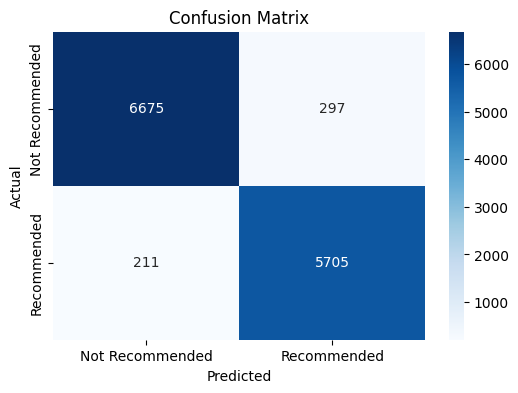

In [ ]:
# Visualizing evaluation Metric Score chart
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Max depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Max features to consider for splitting
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3,
                           n_jobs=1,
                           verbose=2,
                           scoring='accuracy')
# Fit the Algorithm
grid_search.fit(X_train, y_train)
# Predict on the
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test Set Accuracy: {accuracy:.4f}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Test Set Accuracy: 0.9598


##### Which hyperparameter optimization technique have you used and why?

Grid search cv because it was a small datasets .

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

NO . there was no imporoveement the score was almost same .

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# Experiment to see which model performs the best

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

def train_and_evaluate_models(X_train,X_test,y_train, y_test):

    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Naive Bayes': GaussianNB(),
        'Extreme gradient boost': XGBClassifier(),
        'light gbm': LGBMClassifier()
    }

    # Dictionary to store the performance of each model
    model_reports = {}

    # Train and evaluate each model
    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy score and generate classification report
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Store the results in the dictionary
        model_reports[model_name] = {
            'accuracy': accuracy,
            'classification_report': report
        }

    # Sort models by accuracy to find the best performing model
    best_model_name = max(model_reports, key=lambda x: model_reports[x]['accuracy'])
    best_model_report = model_reports[best_model_name]
    print(model_reports)
    # Return the model performance report and the best model
    return model_reports, best_model_name, best_model_report


model_reports, best_model_name, best_model_report = train_and_evaluate_models(X_train,X_test,y_train,y_test)

# Print the results
print(f"Best Model: {best_model_name}")
print(f"Best Model Accuracy: {best_model_report['accuracy']}")
print("Classification Report of Best Model:")
print(best_model_report['classification_report'])

# Print the performance of all models
print("\nAll Model Performance:")
for model_name, report in model_reports.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {report['accuracy']}")
    print(f"Classification Report:\n{report['classification_report']}")


[LightGBM] [Info] Number of positive: 24544, number of negative: 27008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 51552, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476102 -> initscore=-0.095666
[LightGBM] [Info] Start training from score -0.095666
{'Logistic Regression': {'accuracy': 0.9575574177529484, 'classification_report': {'0.0': {'precision': 0.9582188810177823, 'recall': 0.9625326749927389, 'f1-score': 0.9603709338549591, 'support': 6886.0}, '1.0': {'precision': 0.9567911572600905, 'recall': 0.9518493835388204, 'f1-score': 0.9543138728806482, 'support': 6002.0}, 'accuracy': 0.9575574177529484, 'macro avg': {'precision': 0.9575050191389364, 'recall': 0.9571910292657797, 'f1-s

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import joblib
joblib.dump(best_rf_model,'best_random_Forest_model.pkl')

['best_random_Forest_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = joblib.load('best_random_Forest_model.pkl')
y_pred = loaded_model.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9598075729360646


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

IN conclusion our model performermed really well with the dataset and scored more than 96 percent accuracy .

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***